# **Housing Agency Assignment**


***


## Import Libraries


Import the libraries we need for the lab


In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt 
import scipy.stats

Read in the csv file from the URL using the request library


In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)


In [3]:
boston_df.dtypes

Unnamed: 0      int64
CRIM          float64
ZN            float64
INDUS         float64
CHAS          float64
NOX           float64
RM            float64
AGE           float64
DIS           float64
RAD           float64
TAX           float64
PTRATIO       float64
LSTAT         float64
MEDV          float64
dtype: object

In [4]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


## Task 4: Generate Descriptive Statistics and Visualizations

**1- For the "Median value of owner-occupied homes" provide a boxplot**

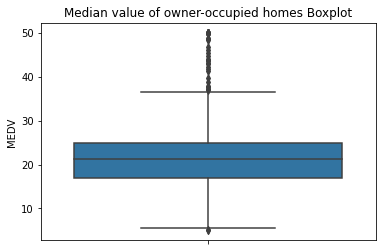

In [5]:
ax = sns.boxplot(y="MEDV", data=boston_df)
ax.set_title('Median value of owner-occupied homes Boxplot')
plt.show(ax)

**Comment:** MEDV has high variation and many outliers especiallat for the higher values.

**2- Provide a  bar plot for the Charles river variable**

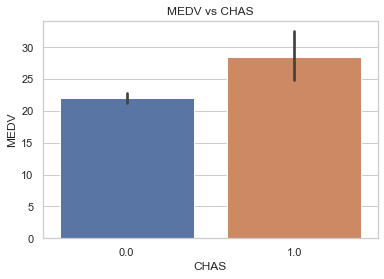

In [6]:
sns.set(style="whitegrid")
ax = sns.barplot(x="CHAS", y="MEDV", data=boston_df)
ax.set_title('MEDV vs CHAS')
plt.show(ax)

**Comment:** Houses near Charles river seems to have higher value

**3-Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)**

For this a new column for age is added to the data

In [7]:
def label_age (row):
    if row['AGE'] <=35:
        return "35 years and younger"
    if (row['AGE'] >35 and row['AGE']<70):
        return "between 35 and 70 years"
    else:
        return "70 years and older"

In [8]:
boston_df["AGE_GROUP"]=boston_df.apply(lambda row: label_age(row), axis=1)

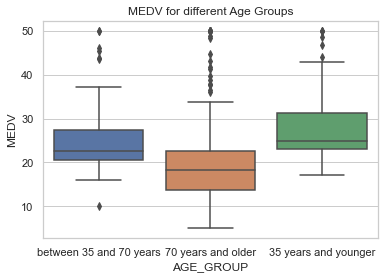

In [9]:
sns.set(style="whitegrid")
ax = sns.boxplot(x="AGE_GROUP", y="MEDV", data=boston_df)
ax.set_title('MEDV for different Age Groups')
plt.show(ax)

**Comment:** Houses with lower age have higher value and "70 years and older" group has the highest number of outliers

**4-Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?**

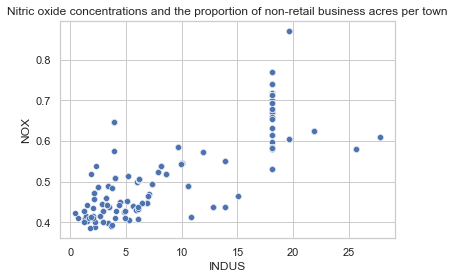

In [10]:
ax = sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
ax.set_title('Nitric oxide concentrations and the proportion of non-retail business acres per town')
plt.show(ax)

**Comment:** As an expected outcome as NOX value incresee so does the NOX value

**5-Create a histogram for the pupil to teacher ratio variable**

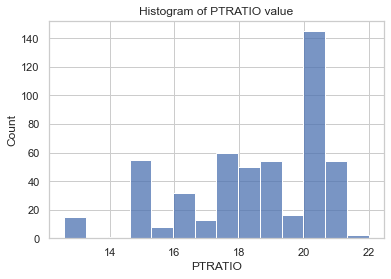

In [11]:
ax=sns.histplot(x='PTRATIO', data=boston_df)
ax.set_title('Histogram of PTRATIO value')
plt.show(ax)

**Comment:** PTRATIO is most frequent around 20

## Task 5: Use the appropriate tests to answer the questions provided

**1-Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)**

State the hypothesis

*   $H\_0: µ\_1 = µ\_2$ ("there is no difference in median value of houses bounded by the Charles river")
*   $H\_1: µ\_1 ≠ µ\_2$ ("there is a difference in  median value of houses bounded by the Charles river")

In [12]:
# We can use the Levene's Test in Python
scipy.stats.levene(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], center='mean')
# since the p-value is lower than 0.05 we cannot assume equality of variance. It should be equal_var = False

LeveneResult(statistic=8.751904896045998, pvalue=0.003238119367639829)

In [13]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var = False)

Ttest_indResult(statistic=-3.113291312794837, pvalue=0.003567170098137517)

**Conclusion:** Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in **value of houses bounded by the Charles river or not**

**2-Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)**

State the hypothesis

*   $H\_0: µ\_1 = µ\_2$ (the two population means are equal)
*   $H\_1:$ At least one of the means differ

_Being built before 1940 means an age of 72._ First, we group the data into cateries. We will create a new column for this newly assigned group our categories will be:
*    age less or equal to 72
*    age greater than 72

In [14]:
boston_df.loc[(boston_df['AGE'] <= 72), 'AGE_GROUP_2'] = '72 years and younger'
boston_df.loc[(boston_df['AGE'] > 72), 'AGE_GROUP_2'] = '72 years older'

In [15]:
scipy.stats.levene(boston_df[boston_df['AGE_GROUP_2'] == '72 years and younger']['MEDV'],
                   boston_df[boston_df['AGE_GROUP_2'] == '72 years older']['MEDV'], 
                   center='mean')
# since the p-value is greater than 0.05 we can assume equality of variance we can continue.

LeveneResult(statistic=2.2342589943507085, pvalue=0.13560714771306712)

In [16]:
f_statistic, p_value = scipy.stats.f_oneway(boston_df[boston_df['AGE_GROUP_2'] == '72 years and younger']['MEDV'],
                   boston_df[boston_df['AGE_GROUP_2'] == '72 years older']['MEDV'],)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 71.81902448579848, P-Value: 2.6129147800045166e-16


**Conclusion:** Since the p-value is very much less than 0.05, we will reject the null hypothesis as there is significant evidence that owner occupied units built prior to 1940 and after.

**3-Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)**

State the hypothesis:

*   $H\_0:$ There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town
*   $H\_1:$ There is relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

In [17]:
scipy.stats.pearsonr(boston_df['INDUS'], boston_df['NOX'])

(0.763651446920915, 7.913361061239593e-98)

**Conclusion:** Since the p-value  (Sig. (2-tailed)  < 0.05, we reject  the Null hypothesis and conclude that __there exists a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.__

**4-What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)**

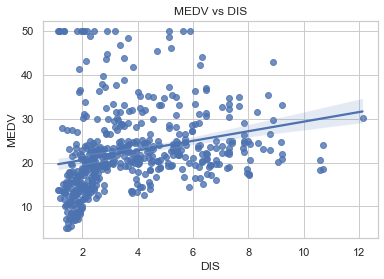

In [18]:
ax = sns.regplot(x='DIS', y='MEDV', data=boston_df)
ax.set_title('MEDV vs DIS')
plt.show(ax)

In [19]:
## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 17 Aug 2022   Prob (F-statistic):           1.21e-08
Time:                        19:20:04   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion:** the p-value is less than the alpha (α) level = 0.05, so there is evidence that there is a difference in value of the house based on weighted distance to the five Boston employment centres.

**The coefficient 1.0916 means that Median value of owner-occupied homes increases by 1.0916 per the unit increase in DIS value.** Reg plot above supports that outcome.

### Thank you for evaluating my work